In [46]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
from pylab import *

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset

# Display the data table for preview

In [47]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [48]:
total_driver_count = city_data_df.driver_count.sum()
total_driver_count

2973

In [49]:

#Take city_data_df and sort alphabetically by city column
sorted_cities_df = city_data_df.sort_values("city")
sorted_cities_df.head()


#create new varibale to store the sorted_cities_df values to a list
city_types_sorted = sorted_cities_df['type'].values.tolist()
print(city_types_sorted)
#show length of this variable
#len(city_types_sorted)

    



['Urban', 'Urban', 'Suburban', 'Suburban', 'Rural', 'Suburban', 'Urban', 'Urban', 'Suburban', 'Suburban', 'Urban', 'Suburban', 'Suburban', 'Urban', 'Suburban', 'Suburban', 'Urban', 'Rural', 'Urban', 'Suburban', 'Rural', 'Urban', 'Urban', 'Urban', 'Rural', 'Urban', 'Urban', 'Suburban', 'Urban', 'Urban', 'Urban', 'Suburban', 'Urban', 'Rural', 'Urban', 'Rural', 'Suburban', 'Suburban', 'Suburban', 'Urban', 'Urban', 'Suburban', 'Suburban', 'Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Suburban', 'Urban', 'Urban', 'Suburban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Suburban', 'Rural', 'Suburban', 'Urban', 'Rural', 'Rural', 'Urban', 'Urban', 'Suburban', 'Urban', 'Urban', 'Suburban', 'Suburban', 'Urban', 'Rural', 'Urban', 'Urban', 'Urban', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Urban', 'Urban', 'Urban', 'Urban', 'Urban', 'Suburban', 'Urban', 'Urban', 'Urban', 'Suburban', 'Suburban', 'Urban', 'Urban', 'Rural', 'Urban', 'Urban', 'Rural', 'Urban', 'Urban', 'Rural', 'Suburban', 'Rural

In [50]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [51]:
#merge the two data frames showing the rows in left table which have matching keys in the right table

merge_df = pd.merge(ride_data_df, city_data_df, on="city", how='right')

merge_df.head(5)
#len(merge_df)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [52]:
#calcuate total fares value
total_fares = merge_df.fare.sum()
#calcluate total rides
total_rides =len(merge_df.ride_id)


In [53]:
#take the merged df and sort the values by the city column

 
sorted_cites_df = merge_df.sort_values("city")

sorted_cites_df.head(5)




    




,city,date,fare,ride_id,driver_count,type
1565,Amandaburgh,2018-01-11 02:22:07,29.24,7279902884763,12,Urban
1562,Amandaburgh,2018-03-05 02:15:38,26.28,906850928986,12,Urban
1563,Amandaburgh,2018-02-24 23:10:49,43.66,6573820412437,12,Urban
1564,Amandaburgh,2018-02-10 20:42:46,36.17,6455620849753,12,Urban
1566,Amandaburgh,2018-01-21 04:12:54,9.26,5528427024492,12,Urban


In [54]:
#average fare per city
average_fare_per_city = merge_df.groupby(["city"]).mean()['fare'].rename("Average Fare per city")
#total rides per city
total_rides_per_city = merge_df.groupby(["city"]).count()['ride_id'].rename("Total rides per city")
#total drivers per city
total_drivers_per_city = merge_df.groupby(["city"]).mean()['driver_count'].rename("Total drivers per city")
#total fare per city
total_fare_per_city =  merge_df.groupby(["city"]).sum()['fare'].rename("Total Fare per city")

#put prior varibables into a dataframe

city_data = pd.DataFrame({"Average_Fare_per_city": average_fare_per_city.round(2), "Total_rides_per_city": total_rides_per_city, "Total_drivers_per_city": total_drivers_per_city, "City_Types": city_types_sorted, "Total_fares_per_city": total_fare_per_city })

city_data.head(5)


,Average_Fare_per_city,Total_rides_per_city,Total_drivers_per_city,City_Types,Total_fares_per_city
city,,,,,
Amandaburgh,24.64,18,12.0,Urban,443.55
Barajasview,25.33,22,26.0,Urban,557.31
Barronchester,36.42,16,11.0,Suburban,582.76
Bethanyland,32.96,18,22.0,Suburban,593.21
Bradshawfurt,40.06,10,7.0,Rural,400.64


In [55]:
#take the prior data frame and group by index city_types and city names
grouped_by = city_data.groupby(['City_Types', 'city' ]).agg({
    'Average_Fare_per_city':"mean",
    'Total_rides_per_city':sum,
    'Total_drivers_per_city':sum})


#located the data only for rural rides
row =  grouped_by.loc['Rural', :]; row
average_rural_fares_per_city = row.Average_Fare_per_city.tolist()
#average_rural_fares_per_city
total_rural_rides_per_city = row.Total_rides_per_city.tolist()
#total_rural_rides_per_city
total_rural_drivers_per_city = row.Total_drivers_per_city.tolist()
#total_rural_drivers_per_city


#located the data only for urban rides
row1 =  grouped_by.loc['Urban', :]; row1
average_urban_fares_per_city = row1.Average_Fare_per_city.tolist()
#average_urban_fares_per_city
total_urban_rides_per_city = row1.Total_rides_per_city.tolist()
#total_urban_rides_per_city
total_urban_drivers_per_city = row1.Total_drivers_per_city.tolist()
#total_urban_drivers_per_city

#located the data only for suburban rides
row3 =  grouped_by.loc['Suburban', :]; row3
average_Suburban_fares_per_city = row3.Average_Fare_per_city.tolist()
#average_Suburban_fares_per_city
total_Suburban_rides_per_city = row3.Total_rides_per_city.tolist()
#total_Suburban_rides_per_city
total_Suburban_drivers_per_city = row3.Total_drivers_per_city.tolist()
#total_Suburban_drivers_per_city




In [56]:

#take the city_data and set index to city type 
grouped_df = city_data.groupby(['City_Types'])
print(grouped_df)                                
grouped_df.head(120)

#set variables for you sums based on the grouped_df
#total rides by city type
total_rides_by_city_type = grouped_df["Total_rides_per_city"].sum()
#total drivers by city type
total_drivers_by_city_type = grouped_df["Total_drivers_per_city"].sum()
#total fares by city type
total_fares_by_city_type = grouped_df["Total_fares_per_city"].sum() 

total_fares_by_city_type

# set variable for % calculations-- take the variables by city type and divide by the total variables based on entire data set

#total rides by city type
percent_of_totalrides_by_citytype =(total_rides_by_city_type / total_rides) * 100
# round the result to 2 decimals 
percent_of_totalrides_by_citytype.round(2)

#total drivers by city type
percent_of_totaldrivers_by_citytype = (total_drivers_by_city_type / total_driver_count) * 100
#round the result to 2 decimals
percent_of_totaldrivers_by_citytype.round(2)

#total fares by city type
percent_of_total_fares_by_city_type = (total_fares_by_city_type / total_fares) * 100
#percent_of_totaldrivers_by_citytype.round(2)
percent_of_total_fares_by_city_type .round(2)

#create DF



City_Types
Rural        6.81
Suburban    30.46
Urban       62.72
Name: Total_fares_per_city, dtype: float64

In [57]:
#create DF
city_type_data = pd.DataFrame({"Percent of total rides by city type": percent_of_totalrides_by_citytype.round(2), "Percent of total fares by city type": percent_of_total_fares_by_city_type .round(2), "Percent of Total drivers by city type": percent_of_totaldrivers_by_citytype.round(2)})

In [58]:
city_type_data

,Percent of total rides by city type,Percent of total fares by city type,Percent of Total drivers by city type
City_Types,,,
Rural,5.26,6.81,2.62
Suburban,26.32,30.46,16.48
Urban,68.42,62.72,80.89


<function matplotlib.pyplot.show(*args, **kw)>

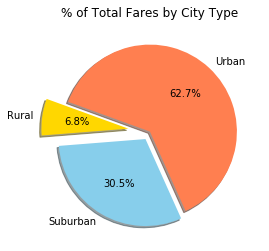

In [59]:
#create pie chart for % of total fares by city type

plt.title("% of Total Fares by City Type")
labels = ["Rural", "Suburban", "Urban"]
sizes = [6.81, 30.46, 62.72]
colors = ["gold", "skyblue", "coral"]
explode = (0.25, .1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=160)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

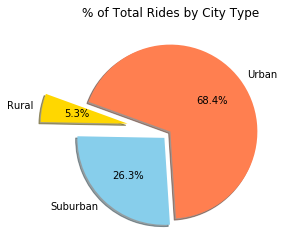

In [60]:
#create pie chart for % of total rides by city type
plt.title("% of Total Rides by City Type")
labels = ["Rural", "Suburban", "Urban"]
sizes = [5.26, 26.32, 68.42]
colors = ["gold", "skyblue", "coral"]
explode = (0.5, .1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=160)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

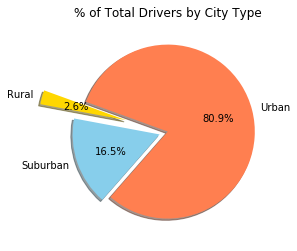

In [61]:
#create pie chart for % of total drivers by city type
plt.title("% of Total Drivers by City Type")
labels = ["Rural", "Suburban", "Urban"]
sizes = [2.62, 16.48, 80.89]
colors = ["gold", "skyblue", "coral"]
explode = (0.5, .1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=160)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

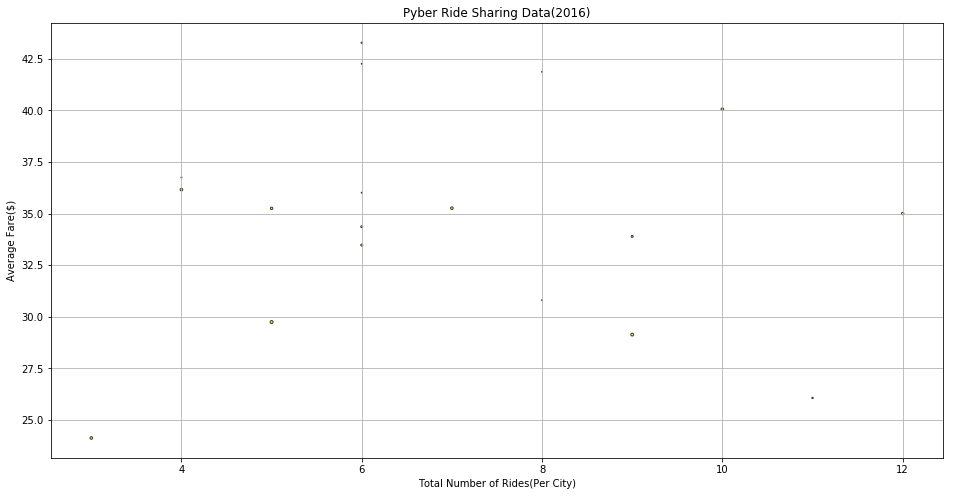

In [62]:
#Rural scatter plot
plt.figure(figsize=(16,8))
plt.grid(True)

#x axis
x = [total_rural_rides_per_city]
#y axis
y = [average_rural_fares_per_city]

plt.scatter(x, y, marker="o", facecolors="gold", edgecolors="black", s=total_rural_drivers_per_city, alpha=0.75)



plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

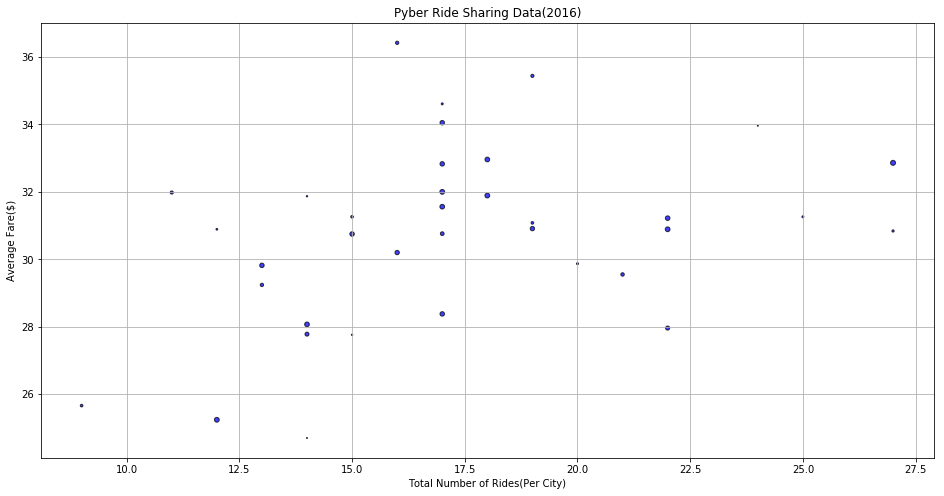

In [63]:
#suburban scatter plot
plt.figure(figsize=(16,8))
plt.grid(True)

#x axis
x = [total_Suburban_rides_per_city]
#y axis
y = [average_Suburban_fares_per_city]

plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black", s=total_Suburban_drivers_per_city, alpha=0.75)



plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.show

Text(0.95, 0.9, 'Note: Circle size correlates with driver count per city')

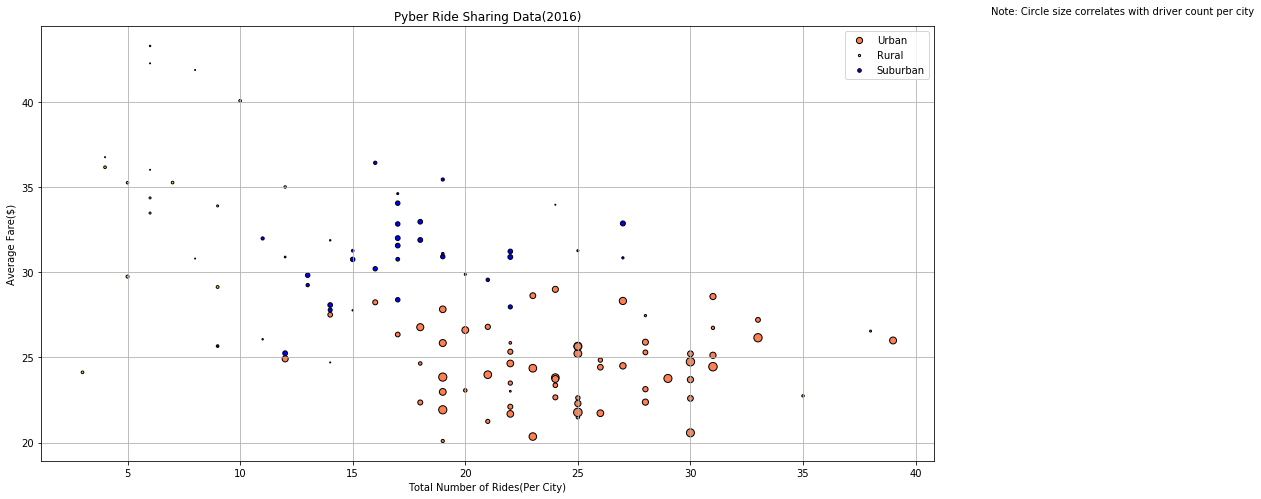

In [64]:
#combine all three on one scatter plot

#Create urban plot
plt.figure(figsize=(16,8))
plt.grid(True)

#x axis
x1 = [total_urban_rides_per_city]
#y axis
y1 = [average_urban_fares_per_city]

plt.scatter(x1, y1, marker="o", facecolors="coral", edgecolors="black", s=total_urban_drivers_per_city, alpha=1.0, label="Urban")

#Create rural
#x axis
x2 = [total_rural_rides_per_city]
#y axis
y2 = [average_rural_fares_per_city]

plt.scatter(x2, y2, marker="o", facecolors="gold", edgecolors="black", s=total_rural_drivers_per_city, alpha=1.0, label="Rural")
#create suburban 
#x axis
x3 = [total_Suburban_rides_per_city]
#y axis
y3 = [average_Suburban_fares_per_city]

plt.scatter(x3, y3, marker="o", facecolors="blue", edgecolors="black", s=total_Suburban_drivers_per_city, alpha=1.0, label="Suburban")

locations = ["Urban", "Rural", "Suburban"]
colors_code = ["r", "g", "b"]
plt.legend()
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
figtext(.95, .9, "Note: Circle size correlates with driver count per city", rotation='horizontal')
